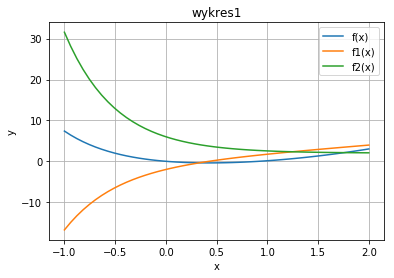

In [36]:
#zadanie 1

import math
import numpy as np
import matplotlib.pyplot as plt
 
def f(x):
    return math.exp(-2*x)+x**2-1
 
def f1(x):
    return math.exp(-2*x)*(-2)+2*x
 
def f2(x):
    return math.exp(-2*x)*4+2
 
x = np.linspace(-1,2)
 
y=[]
y1=[]
y2=[]
 
for i in x:
    y.append(f(i))
    y1.append(f1(i))
    y2.append(f2(i))  
 
plt.plot(x, y,label="f(x)")
plt.plot(x, y1,label="f1(x)")
plt.plot(x, y2,label="f2(x)")
plt.title('wykres1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

#f(x)=0 dla x=0 lub w przybliżeniu dla x=1
#przedzial dla metody bisekcji i siecznych(0.5 , 1.5)
#dla metody stycznych punkt poczatkowy 1.5

In [43]:
#zadanie 2
#2.1

import scipy.optimize as sp
import time

def metoda_bisekcji(funkcja,a,b,eps,i_max):
    if a>b:
        a,b = b,a
    i = 0
    if funkcja(a)*funkcja(b) > 0:
        print("funkcja nie spelnia warunkow")
    elif funkcja(a)==0:
        return a, i
    elif funkcja(b)==0:
        return b, i
    else:
        while abs(a-b) > eps and i < i_max:
                srodek = (a+b)/2
                if funkcja(srodek)*funkcja(a)<0:
                    b = srodek
                else:
                    a = srodek
                i += 1
        return srodek, i

#2.2
#funkcja f(x) jest ciągła w przedziale domkniętym [a;b]
#funkcja przyjmuje różne znaki na końcach przedziału: f(a)*f(b)<0 
#2.3
print(metoda_bisekcji(f,0.5,1.5,10**(-10),100))

#2.4
start = time.clock()
sp.bisect(f,0.5,1.5,xtol=10**(-10),maxiter=100)
end = time.clock()
print("funkcja scipy: ",end-start," sekund")
      
start = time.clock()      
metoda_bisekcji(f,0.5,1.5,10**(-10),100)
end = time.clock()
print("moja funkcja: ",end-start," sekund")

        
    

(0.9165625831228681, 34)
funkcja scipy:  0.00022431552989132797  sekund
moja funkcja:  0.0002325221956311907  sekund


In [47]:
#zadanie 3
#3.1

def metoda_stycznych(funkcja,pochodna,start,eps,i_max):
    if funkcja(start)*pochodna(start)<0:
        print("funkcja nie spelnia warunkow")
    else:
        i = 0
        poprzedni = start - 1 #"poprzedni" nie ma wartosci wiec przypisujemy cos aby petla wykonala sie pierwszy raz
        while i < i_max and abs(start - poprzedni) > eps:
            if abs(pochodna(start)) < eps:
                print("zly punkt poczatkowy")
                #w kolejnych iteracjach dzielilibysmy przez 0
                break
            poprzedni = start;
            start = start - funkcja(start) / pochodna(start)
            i += 1
        return start, i
    
#3.2
#W przedziale [a,b] znajduje się dokładnie jeden pierwiastek.
#Funkcja ma różne znaki na krańcach przedziału, tj. f(a)*f(b)<0.
#Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale.
#3.3
print(metoda_stycznych(f,f1,1.5,10**(-10),100))
#3.4
start = time.clock()
sp.newton(f,1.5,f1,tol=10**(-10),maxiter=100)
end = time.clock()
print("funkcja scipy: ",end-start," sekund")
      
start = time.clock()      
metoda_stycznych(f,f1,1.5,10**(-10),100)
end = time.clock()
print("moja funkcja: ",end-start," sekund")


(0.916562583105698, 6)
funkcja scipy:  0.0001750755354805733  sekund
moja funkcja:  0.00021679275278074783  sekund


In [63]:
#zadanie 4
#4.1

def metoda_siecznych(funkcja,a,b,eps,i_max):
    i = 0
    while abs(a-b) > eps and i < i_max:
        if abs(funkcja(a)-funkcja(b)) < eps: #zabezpieczenie przed dzieleniem przez 0
            print("zle dobrane punkty poczatkowe")
            break
        else:
            x = a - (funkcja(a) * ((a - b) / (funkcja(a) - funkcja(b))))
            if abs(funkcja(x)) < eps:
                break
            b = a 
            a = x
            i += 1
    return x, i


#4.2
#Funkcja f(x) jest określona - dla każdej wartości argumentu x z przedziału <a,b> 
#potrafimy policzyć wartość funkcji.
#Funkcja f(x) jest ciągła -  jej wartości nie "wykonują" nagłych skoków. 
#Funkcja przebiega przez wszystkie wartości pośrednie - nie istnieją zatem przerwy w kolejnych wartościach funkcji.
#Funkcja f(x) na krańcach przedziału <a,b> przyjmuje różne znaki (nie obowiązuje to punktów x1 i x2). 
#Ponieważ funkcja, zgodnie z poprzednim wymogiem, jest ciągła, 
#to przyjmuje w przedziale <a,b> wszystkie wartości pośrednie pomiędzy f(a) i f(b).  
#Wartości te mają różne znaki (czyli leżą po różnych stronach osi OX), zatem musi być taki punkt xo w przedziale <a,b>, 
#dla którego funkcja przyjmuje wartość pośrednią:
#f(a) < f(xo) = 0 < f(b) lub f(a) > f(xo) = 0 > f(b)
#Dodatkowo w przedziale <a,b> pierwsza pochodna f '(x) jest różna od zera. 
#Nie istnieje zatem minimum lub maksimum lokalne. Ten warunek gwarantuje nam, 
#iż sieczna nie będzie równoległa do osi OX, co uniemożliwiłoby wyznaczenie jej punktu przecięcia z tą osią.

#4.3
print(metoda_siecznych(f,0.5,1.5,10**(-10),100))
#4.4
start = time.clock()
sp.newton(f,1.5,f1,tol=10**(-10),maxiter=100)
end = time.clock()
print("funkcja scipy: ",end-start," sekund")
      
start = time.clock()      
metoda_siecznych(f,0.5,1.5,10**(-10),100)
end = time.clock()
print("moja funkcja: ",end-start," sekund")


#4.5
print("\n\n")
print("---------------------------------------------")
start = time.clock()      
metoda_bisekcji(f,0.5,1.5,10**(-10),100)
end = time.clock()
print("metoda bisekcji: ",end-start," sekund")
print(metoda_bisekcji(f,0.5,1.5,10**(-10),100),"przyblizenie / ilosc iteracji")
print("")

start = time.clock()      
metoda_stycznych(f,f1,1.5,10**(-10),100)
end = time.clock()
print("metoda Newtona-Raphsona: ",end-start," sekund")
print(metoda_stycznych(f,f1,1.5,10**(-10),100),"przyblizenie / ilosc iteracji")
print("")

start = time.clock()      
metoda_siecznych(f,0.5,1.5,10**(-10),100)
end = time.clock()
print("metoda siecznych: ",end-start," sekund")
print(metoda_siecznych(f,0.5,1.5,10**(-10),100),"przyblizenie / ilosc iteracji")


(0.916562583058729, 6)
funkcja scipy:  0.0001812305345083587  sekund
moja funkcja:  0.00020174719975329936  sekund



---------------------------------------------
metoda bisekcji:  0.0001894372007882339  sekund
(0.9165625831228681, 34) przyblizenie / ilosc iteracji

metoda Newtona-Raphsona:  0.00016002998108888278  sekund
(0.916562583105698, 6) przyblizenie / ilosc iteracji

metoda siecznych:  0.00014293276126409182  sekund
(0.916562583058729, 6) przyblizenie / ilosc iteracji
